In [6]:
import pandas as pd
import numpy as np

In [7]:
Largest_companies_in_world_df = pd.read_csv(r'C:\Users\user\Desktop\Largest_companies_in_world_set\Largest_companies_in_world.csv')

In [12]:
import numpy as np  # Ensure numpy is imported

def convert_to_billion_fixed(s):
    """
    Convert strings with financial abbreviations to numeric values in billions.
    """
    try:
        # Remove spaces, handle commas, and convert to uppercase
        s = s.replace(",", "").replace(" ", "").upper()
        
        # Check for and convert the billion abbreviation
        if s.endswith('B'):
            return float(s[:-1])  # Remove the 'B' and convert to float
    except Exception as e:
        print(f"Error processing '{s}': {e}")
    
    return np.nan  # Use numpy's nan

# Apply the fixed conversion function to relevant columns again
for col in financial_columns:
    Largest_companies_in_world_df[col] = Largest_companies_in_world_df[col].apply(convert_to_billion_fixed)


Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'
Error processing 'nan': 'float' object has no attribute 'replace'


In [13]:
# Apply the fixed conversion function directly addressing the issue with parsing numbers with commas
def convert_to_billion_commas(s):
    """
    Convert strings with financial abbreviations and commas to numeric values in billions,
    explicitly handling strings with commas.
    """
    if pd.isnull(s):
        return None  # Return None for null values to distinguish from conversion errors
    
    # Remove spaces, handle commas, and convert to uppercase
    s = s.replace(",", "").replace(" ", "").upper()
    
    if s.endswith('B'):
        return float(s[:-1])  # Remove the 'B' and convert to float
    
    # Log unexpected formats
    print(f"Unexpected format: {s}")
    return None

# Apply the updated conversion to all financial columns once again
Largest_companies_in_world_df['assets'] = Largest_companies_in_world_df['assets'].apply(lambda x: convert_to_billion_commas(x) if pd.isnull(x) else x)
Largest_companies_in_world_df['marketValue'] = Largest_companies_in_world_df['marketValue'].apply(lambda x: convert_to_billion_commas(x) if pd.isnull(x) else x)

# Check the DataFrame again
Largest_companies_in_world_df.head()


,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93,41.80,3744.30,399.59
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47,156.36,660.99,2055.22
2,3,ICBC,China,216.77,52.47,6116.82,203.01
3,4,China Construction Bank,China,203.08,48.25,4977.48,172.99
4,5,Agricultural Bank of China,China,186.14,37.92,5356.86,141.82


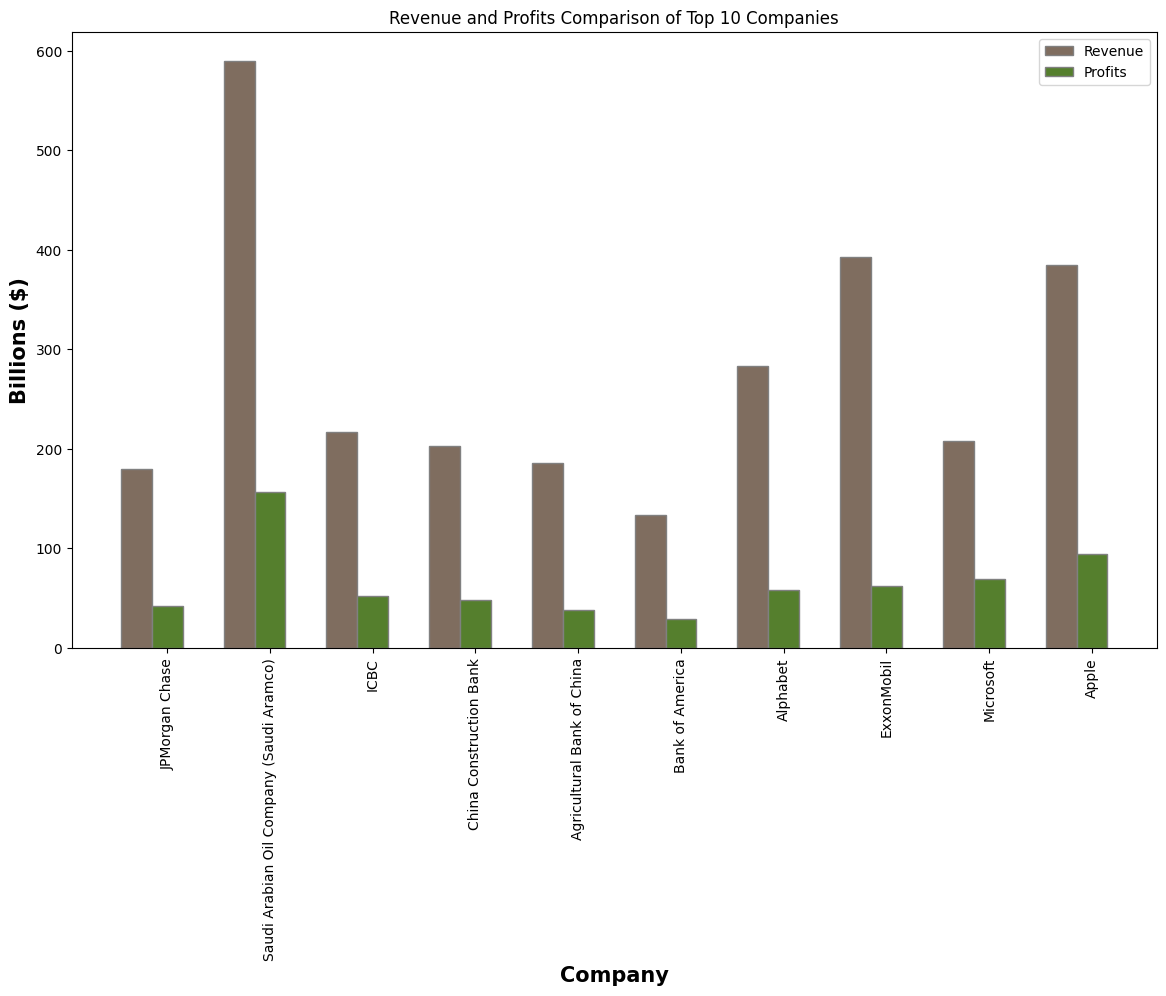

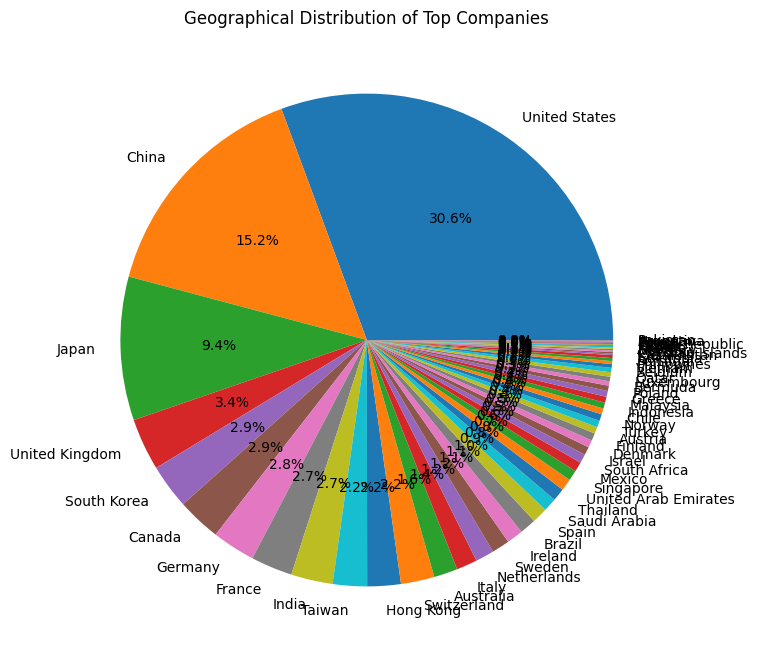

In [14]:
import matplotlib.pyplot as plt

# Top companies for the visualization
top_companies = Largest_companies_in_world_df.head(10)

# Bar chart comparing revenue and profits
plt.figure(figsize=(14, 8))

# Position of the bars on the x-axis
barWidth = 0.3
 
# Set position of bar on X axis
r1 = range(len(top_companies['revenue']))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, top_companies['revenue'], color='#7f6d5f', width=barWidth, edgecolor='grey', label='Revenue')
plt.bar(r2, top_companies['profits'], color='#557f2d', width=barWidth, edgecolor='grey', label='Profits')

# Add xticks on the middle of the group bars
plt.xlabel('Company', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(top_companies['revenue']))], top_companies['organizationName'], rotation=90)
plt.ylabel('Billions ($)', fontweight='bold', fontsize=15)

plt.title('Revenue and Profits Comparison of Top 10 Companies')
plt.legend()
plt.show()

# Pie chart of the geographical distribution
countries = Largest_companies_in_world_df['country'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(countries, labels=countries.index, autopct='%1.1f%%')
plt.title('Geographical Distribution of Top Companies')
plt.show()
